In [1]:
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl', offline=True)
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot  as plt
import nltk
import seaborn as sns

In [2]:
df = pd.read_csv("Tweets_IBM.csv")

In [3]:
df.head()

Tweets           tweet_date  \
0  RT @Ratan100800: #IndiaFightsCorona\r\r\nImpro...  2020-05-27 19:39:21   
1  RT @AICTE_INDIA: .@EBSB_MHRD Digital Activitie...  2020-05-27 19:38:20   
2  RT @BJP4India: Aarogya Setu becomes world's la...  2020-05-27 19:38:07   
3  RT @zoamorani: Plasma donation round 2 ! Last ...  2020-05-27 19:37:01   
4  RT @BJP4India: Aarogya Setu becomes world's la...  2020-05-27 19:35:51   

             User_location  
0                  Ayodhya  
1           Jodhpur, India  
2  Madhya Pradesh, Bhopal   
3                    Dubai  
4         New Delhi, India

In [4]:
df.shape

(34648, 3)

In [5]:
df.tail()

Tweets           tweet_date  \
34643  Thank you sir for the speech. Hope concerned p...  2020-06-02 16:16:01   
34644  RT @ajitdatta: Hats off to @BSYBJP, @Tejasvi_S...  2020-06-02 16:15:42   
34645  RT @navanwita: The hospitality industry must r...  2020-06-02 16:15:40   
34646  @PMOIndia @CovidIndiaSeva @DrHVoffice @DrSJais...  2020-06-02 16:15:30   
34647  The slowdown inÃÂ real GDP is largely due to ...  2020-06-02 16:15:09   

                     User_location  
34643                          NaN  
34644  Dubai, United Arab Emirates  
34645                 New York, NY  
34646               Kolkata, India  
34647                        India

In [6]:
df['Clean_tweets'] = df['Tweets']
df.head()

Tweets           tweet_date  \
0  RT @Ratan100800: #IndiaFightsCorona\r\r\nImpro...  2020-05-27 19:39:21   
1  RT @AICTE_INDIA: .@EBSB_MHRD Digital Activitie...  2020-05-27 19:38:20   
2  RT @BJP4India: Aarogya Setu becomes world's la...  2020-05-27 19:38:07   
3  RT @zoamorani: Plasma donation round 2 ! Last ...  2020-05-27 19:37:01   
4  RT @BJP4India: Aarogya Setu becomes world's la...  2020-05-27 19:35:51   

             User_location                                       Clean_tweets  
0                  Ayodhya  RT @Ratan100800: #IndiaFightsCorona\r\r\nImpro...  
1           Jodhpur, India  RT @AICTE_INDIA: .@EBSB_MHRD Digital Activitie...  
2  Madhya Pradesh, Bhopal   RT @BJP4India: Aarogya Setu becomes world's la...  
3                    Dubai  RT @zoamorani: Plasma donation round 2 ! Last ...  
4         New Delhi, India  RT @BJP4India: Aarogya Setu becomes world's la...

In [7]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt

In [8]:
df['Clean_tweets'] = np.vectorize(remove_pattern)(df['Clean_tweets'],"@[\w]*")
df.head()

Tweets           tweet_date  \
0  RT @Ratan100800: #IndiaFightsCorona\r\r\nImpro...  2020-05-27 19:39:21   
1  RT @AICTE_INDIA: .@EBSB_MHRD Digital Activitie...  2020-05-27 19:38:20   
2  RT @BJP4India: Aarogya Setu becomes world's la...  2020-05-27 19:38:07   
3  RT @zoamorani: Plasma donation round 2 ! Last ...  2020-05-27 19:37:01   
4  RT @BJP4India: Aarogya Setu becomes world's la...  2020-05-27 19:35:51   

             User_location                                       Clean_tweets  
0                  Ayodhya  RT : #IndiaFightsCorona\r\r\nImproving recover...  
1           Jodhpur, India  RT : . Digital Activities  #AICTEdge:\r\r\n\r\...  
2  Madhya Pradesh, Bhopal   RT : Aarogya Setu becomes world's largest cont...  
3                    Dubai  RT : Plasma donation round 2 ! Last time it he...  
4         New Delhi, India  RT : Aarogya Setu becomes world's largest cont...

In [9]:
df['Clean_tweets'] = df['Clean_tweets'].str.replace("[^a-zA-Z#]"," ") 
df.head()

Tweets           tweet_date  \
0  RT @Ratan100800: #IndiaFightsCorona\r\r\nImpro...  2020-05-27 19:39:21   
1  RT @AICTE_INDIA: .@EBSB_MHRD Digital Activitie...  2020-05-27 19:38:20   
2  RT @BJP4India: Aarogya Setu becomes world's la...  2020-05-27 19:38:07   
3  RT @zoamorani: Plasma donation round 2 ! Last ...  2020-05-27 19:37:01   
4  RT @BJP4India: Aarogya Setu becomes world's la...  2020-05-27 19:35:51   

             User_location                                       Clean_tweets  
0                  Ayodhya  RT   #IndiaFightsCorona   Improving recovery r...  
1           Jodhpur, India  RT     Digital Activities  #AICTEdge       Act...  
2  Madhya Pradesh, Bhopal   RT   Aarogya Setu becomes world s largest cont...  
3                    Dubai  RT   Plasma donation round     Last time it he...  
4         New Delhi, India  RT   Aarogya Setu becomes world s largest cont...

In [10]:
df['Clean_tweets'] = df['Clean_tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df.head()

Tweets           tweet_date  \
0  RT @Ratan100800: #IndiaFightsCorona\r\r\nImpro...  2020-05-27 19:39:21   
1  RT @AICTE_INDIA: .@EBSB_MHRD Digital Activitie...  2020-05-27 19:38:20   
2  RT @BJP4India: Aarogya Setu becomes world's la...  2020-05-27 19:38:07   
3  RT @zoamorani: Plasma donation round 2 ! Last ...  2020-05-27 19:37:01   
4  RT @BJP4India: Aarogya Setu becomes world's la...  2020-05-27 19:35:51   

             User_location                                       Clean_tweets  
0                  Ayodhya  #IndiaFightsCorona Improving recovery rate #In...  
1           Jodhpur, India  Digital Activities #AICTEdge Activities conduc...  
2  Madhya Pradesh, Bhopal   Aarogya Setu becomes world largest contact tra...  
3                    Dubai  Plasma donation round Last time helped patient...  
4         New Delhi, India  Aarogya Setu becomes world largest contact tra...

In [11]:
import nltk
from nltk.corpus import stopwords
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [12]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [13]:
def stop_words_removal(df):
    df['Clean_tweets'] = df['Clean_tweets'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    

In [14]:
stop_words_removal(df)

In [15]:
df.head()

Tweets           tweet_date  \
0  RT @Ratan100800: #IndiaFightsCorona\r\r\nImpro...  2020-05-27 19:39:21   
1  RT @AICTE_INDIA: .@EBSB_MHRD Digital Activitie...  2020-05-27 19:38:20   
2  RT @BJP4India: Aarogya Setu becomes world's la...  2020-05-27 19:38:07   
3  RT @zoamorani: Plasma donation round 2 ! Last ...  2020-05-27 19:37:01   
4  RT @BJP4India: Aarogya Setu becomes world's la...  2020-05-27 19:35:51   

             User_location                                       Clean_tweets  
0                  Ayodhya  #IndiaFightsCorona Improving recovery rate #In...  
1           Jodhpur, India  Digital Activities #AICTEdge Activities conduc...  
2  Madhya Pradesh, Bhopal   Aarogya Setu becomes world largest contact tra...  
3                    Dubai  Plasma donation round Last time helped patient...  
4         New Delhi, India  Aarogya Setu becomes world largest contact tra...

In [16]:
def lower_case(df):
    df['Clean_tweets'] = df['Clean_tweets'].apply(lambda x: " ".join(x.lower() for x in x.split()))


In [17]:
lower_case(df)

In [18]:
df.head()

Tweets           tweet_date  \
0  RT @Ratan100800: #IndiaFightsCorona\r\r\nImpro...  2020-05-27 19:39:21   
1  RT @AICTE_INDIA: .@EBSB_MHRD Digital Activitie...  2020-05-27 19:38:20   
2  RT @BJP4India: Aarogya Setu becomes world's la...  2020-05-27 19:38:07   
3  RT @zoamorani: Plasma donation round 2 ! Last ...  2020-05-27 19:37:01   
4  RT @BJP4India: Aarogya Setu becomes world's la...  2020-05-27 19:35:51   

             User_location                                       Clean_tweets  
0                  Ayodhya  #indiafightscorona improving recovery rate #in...  
1           Jodhpur, India  digital activities #aictedge activities conduc...  
2  Madhya Pradesh, Bhopal   aarogya setu becomes world largest contact tra...  
3                    Dubai  plasma donation round last time helped patient...  
4         New Delhi, India  aarogya setu becomes world largest contact tra...

In [19]:
dd = pd.DataFrame()

In [20]:
df['Clean_tweets'] = df['Clean_tweets'].str.replace('\d+', '')

In [21]:
df.head()

Tweets           tweet_date  \
0  RT @Ratan100800: #IndiaFightsCorona\r\r\nImpro...  2020-05-27 19:39:21   
1  RT @AICTE_INDIA: .@EBSB_MHRD Digital Activitie...  2020-05-27 19:38:20   
2  RT @BJP4India: Aarogya Setu becomes world's la...  2020-05-27 19:38:07   
3  RT @zoamorani: Plasma donation round 2 ! Last ...  2020-05-27 19:37:01   
4  RT @BJP4India: Aarogya Setu becomes world's la...  2020-05-27 19:35:51   

             User_location                                       Clean_tweets  
0                  Ayodhya  #indiafightscorona improving recovery rate #in...  
1           Jodhpur, India  digital activities #aictedge activities conduc...  
2  Madhya Pradesh, Bhopal   aarogya setu becomes world largest contact tra...  
3                    Dubai  plasma donation round last time helped patient...  
4         New Delhi, India  aarogya setu becomes world largest contact tra...

In [22]:
tokenized_tweets = df['Clean_tweets'].apply(lambda x: x.split())
tokenized_tweets.head()

0    [#indiafightscorona, improving, recovery, rate...
1    [digital, activities, #aictedge, activities, c...
2    [aarogya, setu, becomes, world, largest, conta...
3    [plasma, donation, round, last, time, helped, ...
4    [aarogya, setu, becomes, world, largest, conta...
Name: Clean_tweets, dtype: object

In [23]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweets = tokenized_tweets.apply(lambda x: [stemmer.stem(i) for i in x])

In [24]:
for i in range(len(tokenized_tweets)):
    tokenized_tweets[i] = ' '.join(tokenized_tweets[i])
df['Clean_tweets'] = tokenized_tweets

In [25]:
df.head()

Tweets           tweet_date  \
0  RT @Ratan100800: #IndiaFightsCorona\r\r\nImpro...  2020-05-27 19:39:21   
1  RT @AICTE_INDIA: .@EBSB_MHRD Digital Activitie...  2020-05-27 19:38:20   
2  RT @BJP4India: Aarogya Setu becomes world's la...  2020-05-27 19:38:07   
3  RT @zoamorani: Plasma donation round 2 ! Last ...  2020-05-27 19:37:01   
4  RT @BJP4India: Aarogya Setu becomes world's la...  2020-05-27 19:35:51   

             User_location                                       Clean_tweets  
0                  Ayodhya  #indiafightscorona improv recoveri rate #india...  
1           Jodhpur, India  digit activ #aictedg activ conduct institut de...  
2  Madhya Pradesh, Bhopal   aarogya setu becom world largest contact trace...  
3                    Dubai  plasma donat round last time help patient note...  
4         New Delhi, India  aarogya setu becom world largest contact trace...

In [26]:
def punctuation_removal(df):
    df['Clean_tweets'] = df['Clean_tweets'].str.replace('[^\w\s]','')
    print(df['Clean_tweets'].head())

In [27]:
punctuation_removal(df)

0    indiafightscorona improv recoveri rate indiast...
1    digit activ aictedg activ conduct institut dep...
2    aarogya setu becom world largest contact trace...
3    plasma donat round last time help patient note...
4    aarogya setu becom world largest contact trace...
Name: Clean_tweets, dtype: object


In [28]:
df.head()

Tweets           tweet_date  \
0  RT @Ratan100800: #IndiaFightsCorona\r\r\nImpro...  2020-05-27 19:39:21   
1  RT @AICTE_INDIA: .@EBSB_MHRD Digital Activitie...  2020-05-27 19:38:20   
2  RT @BJP4India: Aarogya Setu becomes world's la...  2020-05-27 19:38:07   
3  RT @zoamorani: Plasma donation round 2 ! Last ...  2020-05-27 19:37:01   
4  RT @BJP4India: Aarogya Setu becomes world's la...  2020-05-27 19:35:51   

             User_location                                       Clean_tweets  
0                  Ayodhya  indiafightscorona improv recoveri rate indiast...  
1           Jodhpur, India  digit activ aictedg activ conduct institut dep...  
2  Madhya Pradesh, Bhopal   aarogya setu becom world largest contact trace...  
3                    Dubai  plasma donat round last time help patient note...  
4         New Delhi, India  aarogya setu becom world largest contact trace...

In [29]:
def analyze_sentiment(tweet):
    analysis = TextBlob(tweet)
    #analysis = analysis.correct()
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity ==0:
        return 'Neutral'
    else:
        return 'Negative'

In [30]:
df['Sentiment'] = df['Clean_tweets'].apply(lambda x: analyze_sentiment(x))
df.head()

Tweets           tweet_date  \
0  RT @Ratan100800: #IndiaFightsCorona\r\r\nImpro...  2020-05-27 19:39:21   
1  RT @AICTE_INDIA: .@EBSB_MHRD Digital Activitie...  2020-05-27 19:38:20   
2  RT @BJP4India: Aarogya Setu becomes world's la...  2020-05-27 19:38:07   
3  RT @zoamorani: Plasma donation round 2 ! Last ...  2020-05-27 19:37:01   
4  RT @BJP4India: Aarogya Setu becomes world's la...  2020-05-27 19:35:51   

             User_location                                       Clean_tweets  \
0                  Ayodhya  indiafightscorona improv recoveri rate indiast...   
1           Jodhpur, India  digit activ aictedg activ conduct institut dep...   
2  Madhya Pradesh, Bhopal   aarogya setu becom world largest contact trace...   
3                    Dubai  plasma donat round last time help patient note...   
4         New Delhi, India  aarogya setu becom world largest contact trace...   

  Sentiment  
0   Neutral  
1   Neutral  
2   Neutral  
3  Negative  
4   Neutral

In [31]:
df.tail()

Tweets           tweet_date  \
34643  Thank you sir for the speech. Hope concerned p...  2020-06-02 16:16:01   
34644  RT @ajitdatta: Hats off to @BSYBJP, @Tejasvi_S...  2020-06-02 16:15:42   
34645  RT @navanwita: The hospitality industry must r...  2020-06-02 16:15:40   
34646  @PMOIndia @CovidIndiaSeva @DrHVoffice @DrSJais...  2020-06-02 16:15:30   
34647  The slowdown inÃÂ real GDP is largely due to ...  2020-06-02 16:15:09   

                     User_location  \
34643                          NaN   
34644  Dubai, United Arab Emirates   
34645                 New York, NY   
34646               Kolkata, India   
34647                        India   

                                            Clean_tweets Sentiment  
34643  thank speech hope concern peopl take strict ac...  Positive  
34644  hat leader govern machineri frontlin worker ev...   Neutral  
34645  hospit industri must design cope post covid de...  Positive  
34646                 doe social distanc http aypabpmpjp  Positive  
34647  slowdown real larg privat consumpt invest econ...  Positive

In [32]:
df['Sentiment'].value_counts()

Neutral     23347
Positive     8196
Negative     3105
Name: Sentiment, dtype: int64

In [33]:
import plotly.express as px

In [34]:
sentiment_count = df['Sentiment'].value_counts()
sentiment_count = pd.DataFrame({'Sentiment':sentiment_count.index, 'Tweets_count':sentiment_count.values})

In [35]:
fig = px.bar(sentiment_count, x='Sentiment', y='Tweets_count',text='Tweets_count', color='Tweets_count', height=500)
fig

In [36]:
fig2 = px.pie(sentiment_count, values='Tweets_count', names='Sentiment')
fig2

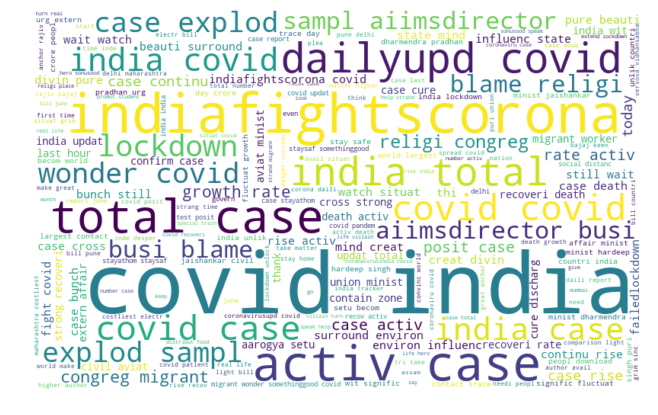

In [37]:
all_words = ' '.join([text for text in df['Clean_tweets']]) 
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate(all_words) 
plt.figure(figsize=(15, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

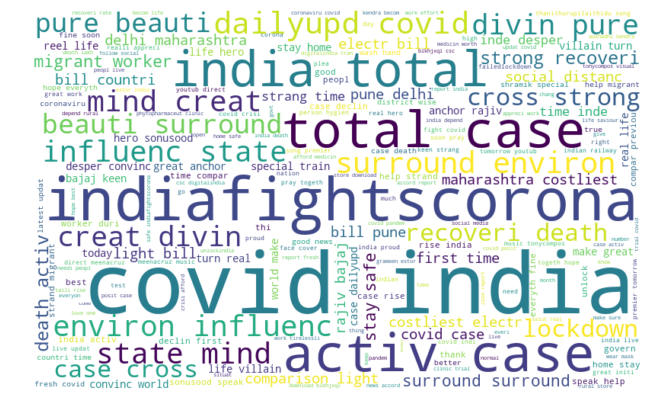

In [38]:
all_words = ' '.join([text for text in df['Clean_tweets'][df['Sentiment']=='Positive']]) 
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate(all_words) 
plt.figure(figsize=(15, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

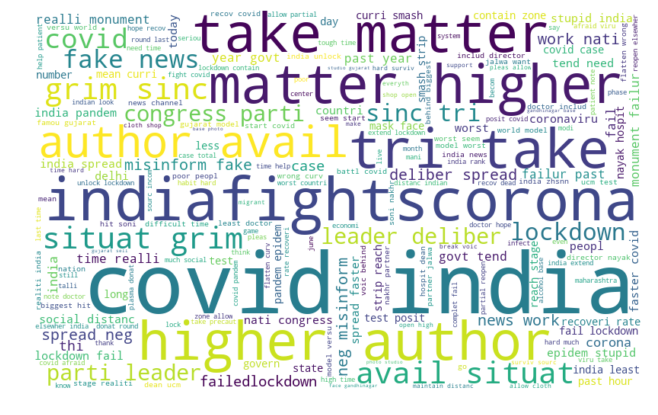

In [39]:
all_words = ' '.join([text for text in df['Clean_tweets'][df['Sentiment']=='Negative']]) 
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate(all_words) 
plt.figure(figsize=(15, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

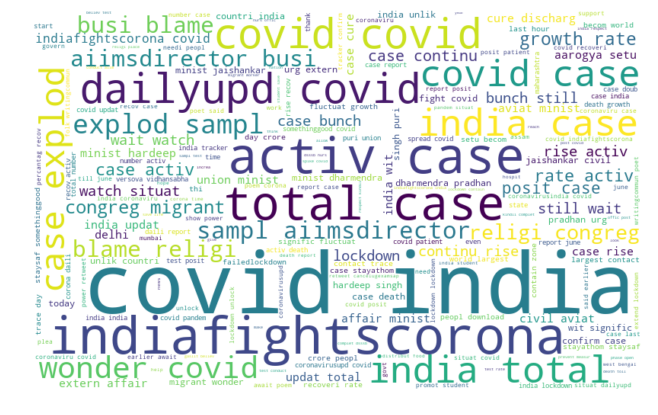

In [40]:
all_words = ' '.join([text for text in df['Clean_tweets'][df['Sentiment']=='Neutral']]) 
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate(all_words) 
plt.figure(figsize=(15, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [46]:
#function to collect hashtags 
def hashtag_extract(x):
    hashtags = []
    #Loop over the words in tweets
    for i in x:
        ht = re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    return hashtags


In [47]:
HT_positive = hashtag_extract(df['Tweets'][df['Sentiment'] == 'Positive'])
HT_negative = hashtag_extract(df['Tweets'][df['Sentiment'] == 'Negative'])
HT_neutral = hashtag_extract(df['Tweets'][df['Sentiment'] == 'Neutral'])

In [48]:
HT_positive = sum(HT_positive,[]) 
HT_negative = sum(HT_negative,[])
HT_neutral = sum(HT_neutral,[])

In [49]:
pos = nltk.FreqDist(HT_positive) 
pos = pd.DataFrame({'Hashtag': list(pos.keys()), 'Count': list(pos.values())}) 
# selecting top 20 most frequent hashtags    
pos = pos.nlargest(columns="Count", n = 15) 

In [50]:
fig_pos = px.bar(pos, x='Hashtag', y='Count', color='Count', height=400)
fig_pos

In [51]:
neg = nltk.FreqDist(HT_negative) 
neg = pd.DataFrame({'Hashtag': list(neg.keys()), 'Count': list(neg.values())}) 
# selecting top 20 most frequent hashtags    
neg = neg.nlargest(columns="Count", n = 15) 

In [52]:
fig_neg = px.bar(neg,x='Hashtag',y='Count',color='Count',height=400)
fig_neg

In [53]:
neu = nltk.FreqDist(HT_neutral)
neu = pd.DataFrame({'Hashtag':list(neu.keys()), 'Count':list(neu.values())})
neu = neu.nlargest(columns="Count",n=15)

In [54]:
fig_neu = px.bar(neu, x='Hashtag',y='Count',color='Count',height=400)
fig_neu

In [55]:
df['tweet_date'] = pd.to_datetime(df['tweet_date'])
df.dtypes

Tweets                   object
tweet_date       datetime64[ns]
User_location            object
Clean_tweets             object
Sentiment                object
dtype: object

In [56]:
df['hours'] = df.tweet_date.dt.hour
df['date'] = df.tweet_date.dt.date

In [57]:
df.head()

Tweets          tweet_date  \
0  RT @Ratan100800: #IndiaFightsCorona\r\r\nImpro... 2020-05-27 19:39:21   
1  RT @AICTE_INDIA: .@EBSB_MHRD Digital Activitie... 2020-05-27 19:38:20   
2  RT @BJP4India: Aarogya Setu becomes world's la... 2020-05-27 19:38:07   
3  RT @zoamorani: Plasma donation round 2 ! Last ... 2020-05-27 19:37:01   
4  RT @BJP4India: Aarogya Setu becomes world's la... 2020-05-27 19:35:51   

             User_location                                       Clean_tweets  \
0                  Ayodhya  indiafightscorona improv recoveri rate indiast...   
1           Jodhpur, India  digit activ aictedg activ conduct institut dep...   
2  Madhya Pradesh, Bhopal   aarogya setu becom world largest contact trace...   
3                    Dubai  plasma donat round last time help patient note...   
4         New Delhi, India  aarogya setu becom world largest contact trace...   

  Sentiment  hours        date  
0   Neutral   19.0  2020-05-27  
1   Neutral   19.0  2020-05-27  
2   Neutral   19.0  2020-05-27  
3  Negative   19.0  2020-05-27  
4   Neutral   19.0  2020-05-27

In [58]:
hr_tweet = df['hours'].value_counts()
hr_tweet = pd.DataFrame({'Hour_values':hr_tweet.index, 'Tweets_count':hr_tweet.values})

In [59]:
fig_hour = px.bar(hr_tweet, x='Hour_values', y='Tweets_count', color='Tweets_count', height=500)
fig_hour

In [60]:
import string
from collections import Counter

In [61]:
text_tweets = df['Clean_tweets']
text_tweets

0        indiafightscorona improv recoveri rate indiast...
1        digit activ aictedg activ conduct institut dep...
2        aarogya setu becom world largest contact trace...
3        plasma donat round last time help patient note...
4        aarogya setu becom world largest contact trace...
5        indiafightscorona tribut frontlin coronawarrio...
6        here doctor nurs sion hospit mumbai clap babi ...
7        aarogya setu becom world largest contact trace...
8        sensit natur work send migrant worker back hom...
9        thank organis inform session indian economi cu...
10       indiafightscorona conduct digit film product c...
11       thi best india uddhavthackeray handl covid cri...
12       railway transport lakh passeng home state shra...
13       indiafightscorona improv recoveri rate indiast...
14                                         http xanzpjmmvt
15       india approx case lakh popul amongst lowest wo...
16       indiafightscorona robust health prepared india.

In [62]:
text = ''
length = len(text_tweets)
for i in range(0, length):
    text = str(text_tweets[i])+" "+text

In [63]:
text

'slowdown real larg privat consumpt invest economi gdp covid http debc xouoq doe social distanc http aypabpmpjp hospit industri must design cope post covid demand covid india social hat leader govern machineri frontlin worker everi citizen thank speech hope concern peopl take strict action univers without live http covid anim chart updat june sourc who covid covid covid india covid italia http yhnvx madhyapradesh peopl test posit covid total number case state http hat leader govern machineri frontlin worker everi citizen support student cancel exam ipuexam ipucancelexam covid covid india http manipur corona daili report june manipur report case covid recoveri last hour http yicruh kolkata cycloneamphan mumbai nisargacyclon delhi earthquakeindelhi jaipur locustsattack vizag http bsmivn justin karnataka govern decid reopen school state phase juli covid covid indi tri take matter higher author avail situat grim sinc covid india case day case day covid india dumbhakt http elwbokm nasscom t

In [64]:
# Removing punctuations
cleaned_text = text.translate(str.maketrans('', '', string.punctuation))

In [65]:
token_words = cleaned_text.split()

In [66]:
final_words = [word for word in token_words if word not in stop]

In [67]:
em = pd.read_csv("Emotions_final.csv")

In [68]:
em.columns = ['Words','Emotion']
em.shape

(2057, 2)

In [69]:
elist = []
for i in range(0,2057):
    if em['Words'][i] in final_words:
        elist.append(em['Emotion'][i])

In [70]:
dd = pd.DataFrame({'Emotion':elist})
dd

Emotion
0       Happy
1    Surprise
2       Happy
3        Fear
4       Angry
5       Angry
6        Fear
7        Fear
8    Surprise
9       Angry
10      Angry
11      Happy
12      Happy
13      Happy
14   Surprise
15   Surprise
16       Fear
17      Happy
18       Fear
19   Surprise
20      Angry
21   Surprise
22      Angry
23      Happy
24       Fear
25   Surprise
26      Angry
27      Happy
28      Happy
29      Happy
..        ...
219     Happy
220     Happy
221     Happy
222     Happy
223       Sad
224     Angry
225     Happy
226  Surprise
227      Fear
228     Happy
229  Surprise
230  Surprise
231      Fear
232       Sad
233      Fear
234     Happy
235     Happy
236     Angry
237     Angry
238     Angry
239     Happy
240     Happy
241     Happy
242       Sad
243  Surprise
244     Happy
245     Happy
246     Angry
247     Happy
248     Happy

[249 rows x 1 columns]

In [71]:
Emotion_count = dd['Emotion'].value_counts()
Emotion_count = pd.DataFrame({'Emotion':Emotion_count.index, 'Emotion_score':Emotion_count.values})

In [72]:
Emotion_count

Emotion  Emotion_score
0     Happy            110
1     Angry             47
2       Sad             39
3      Fear             35
4  Surprise             18

In [73]:
Emotion_count.to_csv("Emotions_India_new.csv",index=False)

In [74]:
fig_emotion = px.bar(Emotion_count, x='Emotion', y='Emotion_score',text='Emotion_score', color='Emotion_score', height=500)
fig_emotion

In [75]:
df.dtypes

Tweets                   object
tweet_date       datetime64[ns]
User_location            object
Clean_tweets             object
Sentiment                object
hours                   float64
date                     object
dtype: object

In [76]:
df['date'][0]

datetime.date(2020, 5, 27)

In [77]:
df['date'] = df['date'].astype(str)

In [78]:
df['date'].value_counts()

2020-05-31    7370
2020-05-30    4028
2020-06-05    3653
2020-06-03    3395
2020-06-04    3272
2020-06-01    2916
2020-05-27    2078
2020-05-29    1425
2020-02-06    1328
2020-04-06    1315
2020-03-06    1228
2020-05-06    1129
2020-06-02     979
2020-05-25     136
2020-05-28     131
2020-05-23     110
2020-05-24      78
2020-05-26      76
NaT              1
Name: date, dtype: int64

In [79]:
day_cnt = df[df['date'] == '2020-05-27']

In [ ]:
dfdt = df[df['date']==value]
dnt = dfdt['Sentiment'].value_counts()
dnt = pd.DataFrame({'cat':dnt.index, 'values':dnt.values})

In [80]:
day_cnt = day_cnt['Sentiment'].value_counts()
day_cnt = pd.DataFrame({'Sentiment':day_cnt.index, 'Tweets on that day':day_cnt.values})

In [81]:
fig_day_cnt = px.bar(day_cnt, x='Sentiment', y='Tweets on that day', text='Tweets on that day', color='Tweets on that day', height=500)
fig_day_cnt

In [82]:
df.to_csv("Data_show.csv",index=False)

In [83]:
df['Clean_tweets'] = df['Clean_tweets'].str.replace('\d+','')

In [85]:
def num_numerics(df):
    df['numerics'] = df['Clean_tweets'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
    print(df[['Clean_tweets','numerics']].head())

In [86]:
num_numerics(df)

                                        Clean_tweets  numerics
0  indiafightscorona improv recoveri rate indiast...         0
1  digit activ aictedg activ conduct institut dep...         0
2  aarogya setu becom world largest contact trace...         0
3  plasma donat round last time help patient note...         0
4  aarogya setu becom world largest contact trace...         0


In [87]:
df['numerics'].value_counts()

0    34648
Name: numerics, dtype: int64

In [91]:
dfw = df[df['Sentiment']== 'Neutral']
freq = pd.Series(' '.join(dfw['Clean_tweets']).split()).value_counts().sort_values(ascending=False)[:40]
freq.to_dict()
freq = pd.DataFrame({'words':freq.index, 'count':freq.values})
freq = freq.iloc[::-1]

In [92]:
freq

words  count
39             govern    629
38              blame    652
37             wonder    659
36               govt    661
35              delhi    678
34              state    689
33              recov    700
32                day    702
31              world    710
30            student    719
29             number    726
28             religi    731
27             situat    734
26               busi    769
25            countri    787
24              sampl    794
23             unlock    844
22            migrant    888
21              today    892
20               rise    899
19           dailyupd    909
18              updat    999
17              posit   1015
16               test   1040
15             minist   1072
14              death   1074
13               rate   1081
12         coronaviru   1094
11             corona   1164
10             report   1206
9               peopl   1223
8                june   1279
7               total   1874
6            lockdown   2231
5               activ   2403
4   indiafightscorona   3983
3                case   6544
2               india   9699
1               covid  12783
0                http  15276